In [1]:
import pandas as pd
import numpy as np

In [2]:
election = pd.read_csv("Election_Data.csv")

## Data Ingestion

#### The dataset has been loaded and viewed to understand the context. Followed by that as part of EDA, null values, duplicates and outlier checks are done to make the dataset cleaner for further desciptive analysis and model application.

In [3]:
election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


### Exploratory Data Analysis

In [4]:
election=election.iloc[:,1:]
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
election.shape

(1525, 9)

In [7]:
election.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

### Checking for null and duplicate values

In [8]:
for col in election.columns:
    print("Number of null values in "+col+" column: "+str(election[col].isnull().sum()))

Number of null values in vote column: 0
Number of null values in age column: 0
Number of null values in economic.cond.national column: 0
Number of null values in economic.cond.household column: 0
Number of null values in Blair column: 0
Number of null values in Hague column: 0
Number of null values in Europe column: 0
Number of null values in political.knowledge column: 0
Number of null values in gender column: 0


In [9]:
print(election.duplicated().sum())

8


In [10]:
election=election.drop_duplicates()

In [11]:
print(election.duplicated().sum())

0


In [12]:
election.shape

(1517, 9)

No null values are found. Eight duplicate records are removed from the data.

In [13]:
for col in election.columns:
    if election[col].dtype=='object':
        print(election[col].value_counts().sort_values(ascending=False))
        print('\n')

vote
Labour          1057
Conservative     460
Name: count, dtype: int64


gender
female    808
male      709
Name: count, dtype: int64




### Bivariate Analysis

### Correlation

In [14]:
correlation=election[['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','age']].corr()

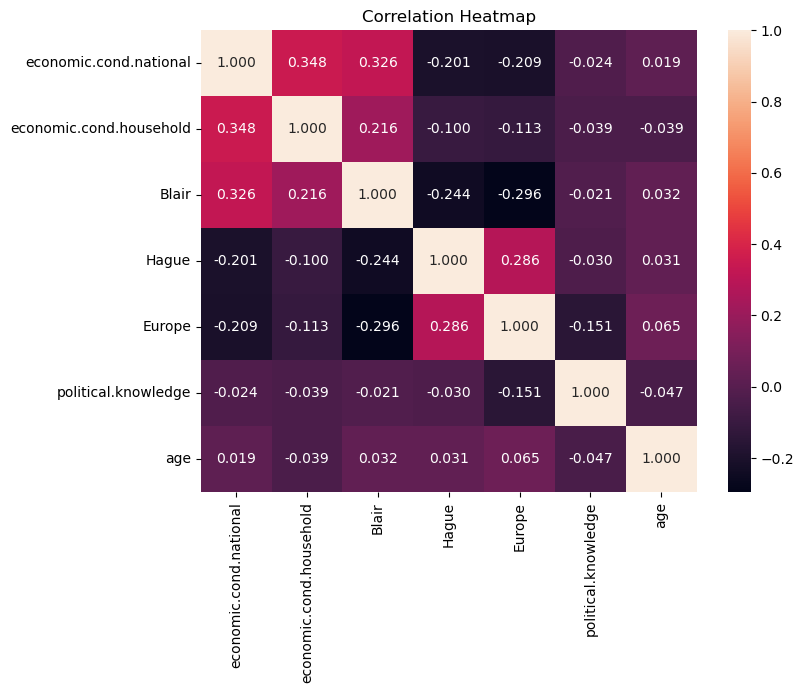

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation,annot=True,fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

#### There is a positive correlation between National Economic Condition and Household Economic Condition ranging upto 35% which can be considered as moderate as it is below 50% and used for ML model application. The rest are ignored because they are either postively or negatively correlated below 35%

### Outliers

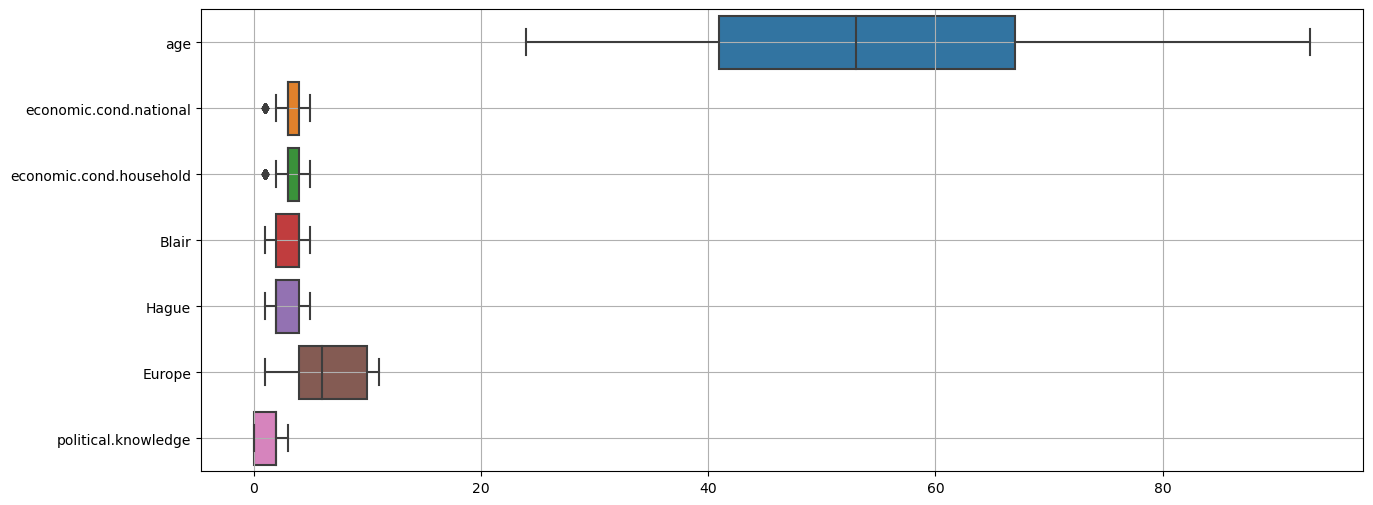

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(election,orient='h')
plt.grid()
plt.show()

#### There are no significant outliers identified in the data as everything is in the scale of 1 to 5 for Household Economic Condition and Household Economic Condition. Hence the scale value of 1 can't be considered as an outlier in this context.

In [19]:
election.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


## Data Preparation

#### For applying model, all categorical variables are converted to numerical columns using label/dummy encoding. As a fincal step, train and test data has been prepared in which suitable machine learning models are applied for future prediction.

### Dummy encoding for categorical columns

In [20]:
election_dummy=pd.get_dummies(election,drop_first=True,dtype=int)

In [21]:
election_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [22]:
election_dummy['vote_Labour'].value_counts(normalize=True)

vote_Labour
1    0.69677
0    0.30323
Name: proportion, dtype: float64

#### Though the proportion of Conservative category seems less compared to Labour, it is more than 30% of the total number of observations. Hence, this can be used for further model analysis.

### Univariate Analysis

In [31]:
election_dummy.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.696770,0.467370
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.459805,0.499099
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.000000,0.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000,1.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000,1.000000


From the above summary, it is observed that Labor party has more voting compared to Conservative party. Similarly, Blair(Labour party leader) received more than 50% of high ratings(4 and 5). Hague has less supporters with more than 50% of ratings below the median scale of 3. Male and female voters are almost equal in number (male voters are 49.9%). European integration remains a contentious issue with strong opinions on both sides (Median value at 6).

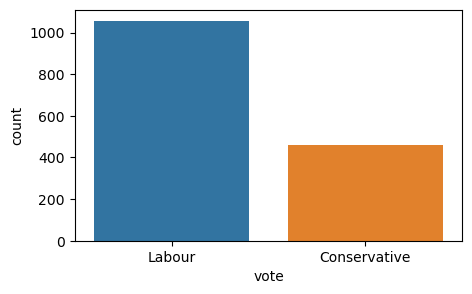

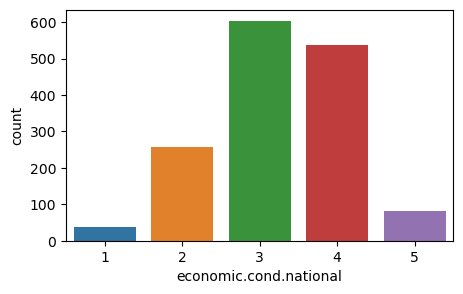

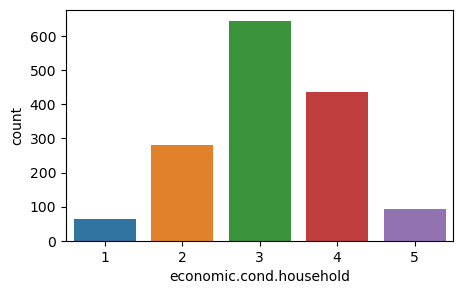

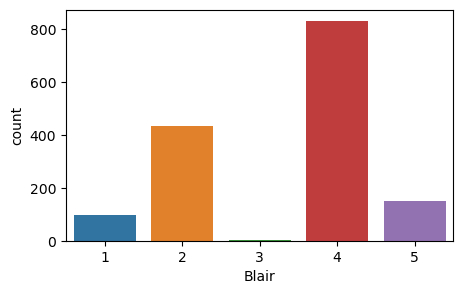

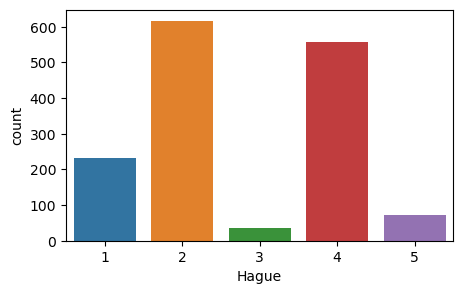

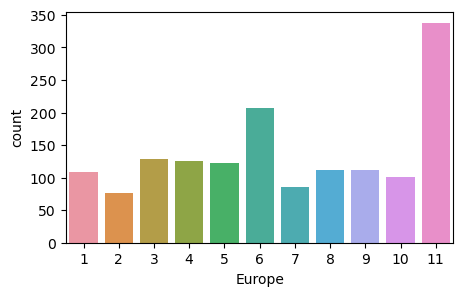

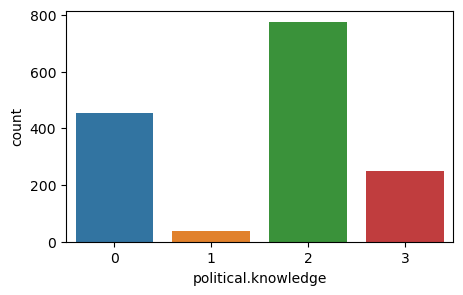

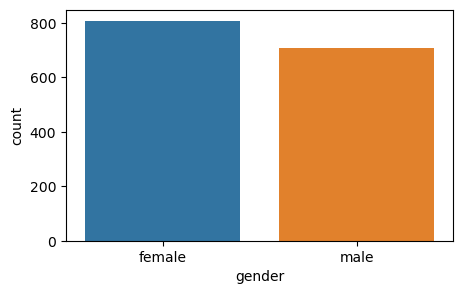

In [95]:
for col in ['vote','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge','gender']:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=election)
    plt.show()

#### Scaling is not done for any columns in the dataset as all columns share the same range of numbers.

### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=election_dummy.drop('vote_Labour',axis=1)

In [34]:
y=election_dummy['vote_Labour']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.30,random_state=1,stratify=election_dummy['vote_Labour'])

In [36]:
y_test.value_counts(normalize=True)

vote_Labour
1    0.697368
0    0.302632
Name: proportion, dtype: float64

In [37]:
y_train.value_counts(normalize=True)

vote_Labour
1    0.696513
0    0.303487
Name: proportion, dtype: float64

Same proportion of Labour(1) and Conservative(0) has been used for both train and test data using stratify parameter for better performance of the model.

In [38]:
for col in election_dummy.columns:
    Q1,Q3=np.percentile(election_dummy[col],[25,75])
    IQR=Q3-Q1
    print(col,":")
    print("Lower Limit: ",Q1-(1.5*IQR))
    print("Upper Limit: ",Q3+(1.5*IQR))
    print("\n")

age :
Lower Limit:  2.0
Upper Limit:  106.0


economic.cond.national :
Lower Limit:  1.5
Upper Limit:  5.5


economic.cond.household :
Lower Limit:  1.5
Upper Limit:  5.5


Blair :
Lower Limit:  -1.0
Upper Limit:  7.0


Hague :
Lower Limit:  -1.0
Upper Limit:  7.0


Europe :
Lower Limit:  -5.0
Upper Limit:  19.0


political.knowledge :
Lower Limit:  -3.0
Upper Limit:  5.0


vote_Labour :
Lower Limit:  -1.5
Upper Limit:  2.5


gender_male :
Lower Limit:  -1.5
Upper Limit:  2.5




## Modelling

#### Since the target variable is categorical, we are applying Logistic regression, Decistion Tree and Random forest models to check the performance of these models on the data, before choosing the most optimized model for prediction.

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
LogitModel=LogisticRegression(solver='newton-cg',max_iter=100,penalty=None)

In [41]:
LogitModel.fit(X_train, y_train)

LogisticRegression(penalty=None, solver='newton-cg')

In [42]:
y_train_predict=LogitModel.predict(X_train)
y_test_predict=LogitModel.predict(X_test)

In [43]:
ytest_predict_prob=LogitModel.predict_proba(X_test)

In [44]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.199510,0.800490
1,0.610744,0.389256
2,0.083468,0.916532
3,0.030816,0.969184
4,0.135993,0.864007


In [45]:
LogitModel.score(X_train, y_train)

0.827521206409048

In [46]:
LogitModel.score(X_test, y_test)

0.8552631578947368

In [47]:
#ROC -Receiver operating characterisitcs
#AUC - Area under the curve

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#### ROC Curve and AUC Score

0.8770833508434261


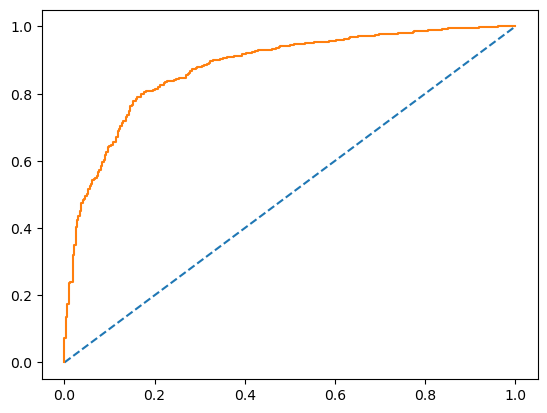

In [49]:
ytrain_predict_prob=LogitModel.predict_proba(X_train)[:,1]
train_auc=roc_auc_score(y_train,ytrain_predict_prob)
train_fpr,train_tpr,train_thresholds=roc_curve(y_train,ytrain_predict_prob)
print(train_auc)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(train_fpr,train_tpr)

0.9128383921246923


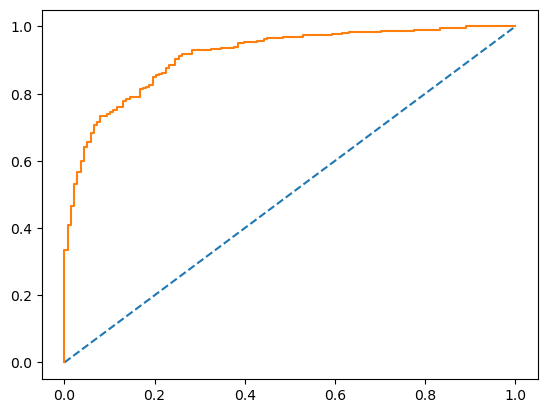

In [50]:
ytest_predict_prob=LogitModel.predict_proba(X_test)[:,1]
test_auc=roc_auc_score(y_test,ytest_predict_prob)
test_fpr,test_tpr,test_thresholds=roc_curve(y_test,ytest_predict_prob)
print(test_auc)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(test_fpr,test_tpr)

#### Confusion Matrix

In [51]:
confusion_matrix(y_train,y_train_predict)

array([[213, 109],
       [ 74, 665]], dtype=int64)

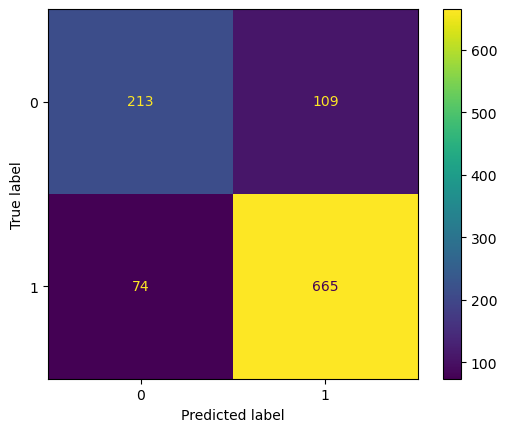

In [52]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict)

In [53]:
confusion_matrix(y_test,y_test_predict)

array([[ 94,  44],
       [ 22, 296]], dtype=int64)

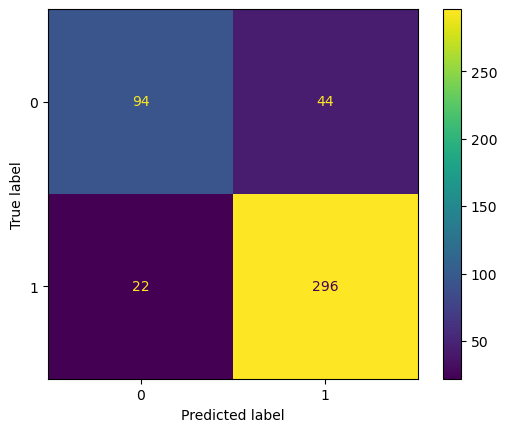

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict)

#### Classification Report

In [55]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [56]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



#### Inferences(Logistic Regression Model):
##### The Conservative category f1-score is below 70% while it is above 90% for Labour category. This can be due to the imbalance in the number of records in the data. Also, the logistic regression model performance is good as it's prediction accuracy rate is almost similar to both train and test data.

### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [60]:
# accuracy_train=[]
# accuracy_test=[]

In [61]:
max_depth_values = [3,4,5,6,7]
min_samples_split_values = range(30,61)
min_samples_leaf_values = range(10,21)

In [62]:
best_score_dt = 0
best_params_dt = {}

In [63]:
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            dt_model = DecisionTreeClassifier(criterion='gini',max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,random_state=1)
            dt_model.fit(X_train, y_train)

            score = dt_model.score(X_test, y_test)

            if score > best_score_dt:
                best_score_dt = score
                best_params_dt = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

print("Best Parameters:", best_params_dt)
print("Best Score:", best_score_dt)

Best Parameters: {'max_depth': 6, 'min_samples_split': 33, 'min_samples_leaf': 10}
Best Score: 0.8486842105263158


Possible range of values for each parameters has been set to run in loop and identifed the best paramter values with comparitively high accuracy

In [96]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=33,min_samples_leaf=10,random_state=1)
dt_model.fit(X_train,y_train)
train_tables=['No','Yes']
dot_file='tree_file.dot'
tree_file=open(dot_file,'w')
dot_data=tree.export_graphviz(dt_model,out_file=tree_file,feature_names=list(X_train), class_names=list(train_tables))
tree_file.close()

The decision tree can be visualized by copy pasting the code in the below link
http://www.webgraphviz.com/?tab=map

In [97]:
dt_model.feature_importances_

array([0.06131654, 0.04451217, 0.00661513, 0.1192126 , 0.42334649,
       0.19401435, 0.1486345 , 0.00234821])

In [98]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_male'],
      dtype='object')

In [99]:
print(pd.DataFrame(dt_model.feature_importances_,columns=["Importance"],index=X_train.columns).sort_values("Importance",ascending=False))

                         Importance
Hague                      0.423346
Europe                     0.194014
political.knowledge        0.148634
Blair                      0.119213
age                        0.061317
economic.cond.national     0.044512
economic.cond.household    0.006615
gender_male                0.002348


The above result shows the important features considered in determining the party to vote. In this case, the rating of Hague is highly considered for voting decision.

In [100]:
y_train_predict_dt=dt_model.predict(X_train)
y_test_predict_dt=dt_model.predict(X_test)

In [101]:
dt_model.score(X_train, y_train)

0.8454288407163054

In [102]:
dt_model.score(X_test, y_test)

0.8486842105263158

#### ROC Curve and AUC Score

0.9117428285663857


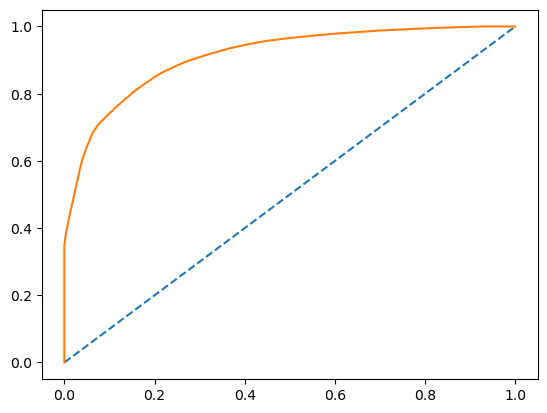

In [103]:
ytrain_predict_prob_dt=dt_model.predict_proba(X_train)[:,1]
train_auc_dt=roc_auc_score(y_train,ytrain_predict_prob_dt)
dt_train_fpr,dt_train_tpr,dt_train_thresholds=roc_curve(y_train,ytrain_predict_prob_dt)
print(train_auc_dt)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(dt_train_fpr,dt_train_tpr)

0.8773243095433416


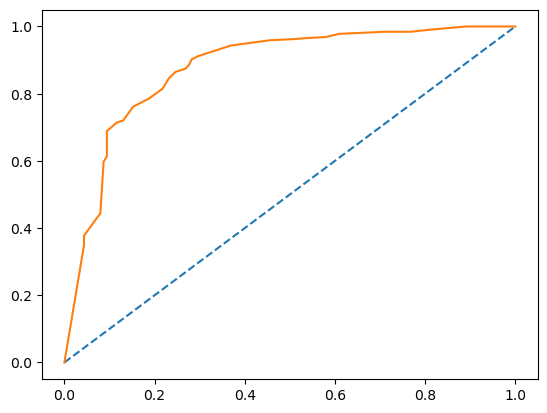

In [104]:
ytest_predict_prob_dt=dt_model.predict_proba(X_test)[:,1]
test_auc_dt=roc_auc_score(y_test,ytest_predict_prob_dt)
dt_test_fpr,dt_test_tpr,dt_test_thresholds=roc_curve(y_test,ytest_predict_prob_dt)
print(test_auc_dt)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(dt_test_fpr,dt_test_tpr)

#### Confusion Matrix

In [105]:
confusion_matrix(y_train,y_train_predict_dt)

array([[233,  89],
       [ 75, 664]], dtype=int64)

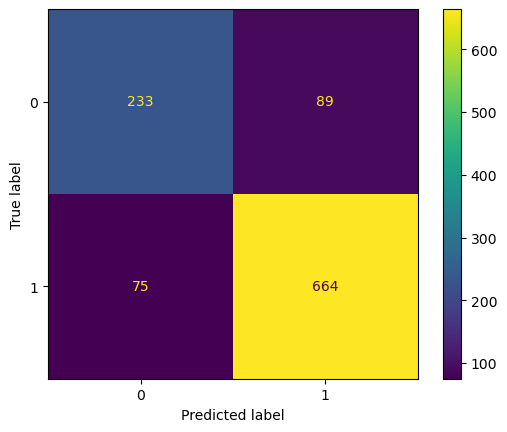

In [106]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict_dt)

In [107]:
confusion_matrix(y_test,y_test_predict_dt)

array([[ 97,  41],
       [ 28, 290]], dtype=int64)

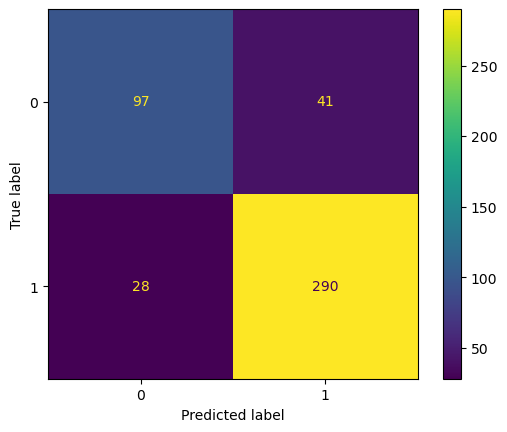

In [108]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_dt)

#### Classification Report

In [109]:
print(classification_report(y_train,y_train_predict_dt))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       322
           1       0.88      0.90      0.89       739

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [110]:
print(classification_report(y_test,y_test_predict_dt))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.83      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



#### Inferences(Decision Tree Model):
##### The F1-score (0.74,0.89) and accuracy (0.85) of Decision Tree model is almost similar to the Logisitic Regression results (Accuracy - 0.86, F-score (0.74,0.90) ).


### Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
n_estimators_values = [50, 100, 150]
max_depth_values = [3,4,5,6,7]
min_samples_split_values = range(30,61)
min_samples_leaf_values = range(10,21)

In [81]:
best_score = 0
best_params = {}

In [82]:
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                RF_model = RandomForestClassifier(n_estimators=n_estimators,
                                                max_depth=max_depth,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf,
                                                random_state=1)
                RF_model.fit(X_train, y_train)
                
                score = RF_model.score(X_test, y_test)
                
                # Check if current score is better than the best score
                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_estimators': 50, 'max_depth': 6, 'min_samples_split': 30, 'min_samples_leaf': 13}
Best Score: 0.8771929824561403


In [83]:
RF_model = RandomForestClassifier(n_estimators=50,max_depth=6,min_samples_split=30,min_samples_leaf=13,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=13, min_samples_split=30,
                       n_estimators=50, random_state=1)

In [84]:
y_train_predict_rf=RF_model.predict(X_train)
y_test_predict_rf=RF_model.predict(X_test)

In [85]:
RF_model.score(X_train, y_train)

0.8482563619227145

In [86]:
RF_model.score(X_test, y_test)

0.8771929824561403

#### ROC Curve and AUC Score

0.908389295589978


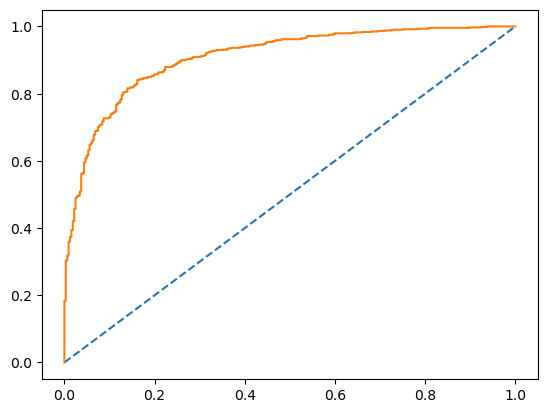

In [87]:
ytrain_predict_prob_RF=RF_model.predict_proba(X_train)[:,1]
train_auc_rf=roc_auc_score(y_train,ytrain_predict_prob_RF)
rf_train_fpr,rf_train_tpr,rf_train_thresholds=roc_curve(y_train,ytrain_predict_prob_RF)
print(train_auc_rf)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(rf_train_fpr,rf_train_tpr)

0.9226825266611977


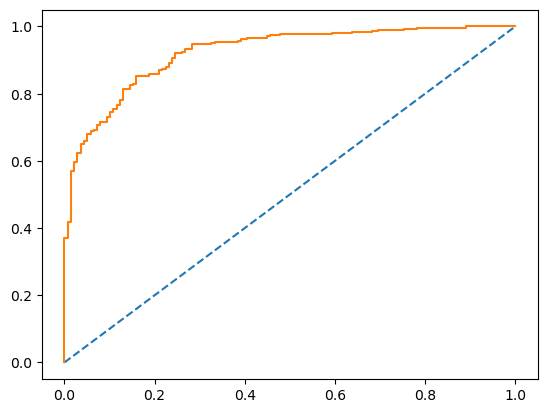

In [88]:
ytest_predict_prob_RF=RF_model.predict_proba(X_test)[:,1]
test_auc_rf=roc_auc_score(y_test,ytest_predict_prob_RF)
rf_test_fpr,rf_test_tpr,rf_test_thresholds=roc_curve(y_test,ytest_predict_prob_RF)
print(test_auc_rf)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(rf_test_fpr,rf_test_tpr)

#### Confusion Matrix

In [89]:
confusion_matrix(y_train,y_train_predict_rf)

array([[215, 107],
       [ 54, 685]], dtype=int64)

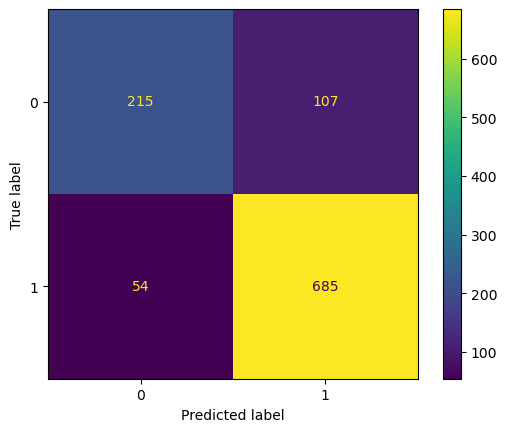

In [90]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_predict_rf)

In [91]:
confusion_matrix(y_test,y_test_predict_rf)

array([[ 99,  39],
       [ 17, 301]], dtype=int64)

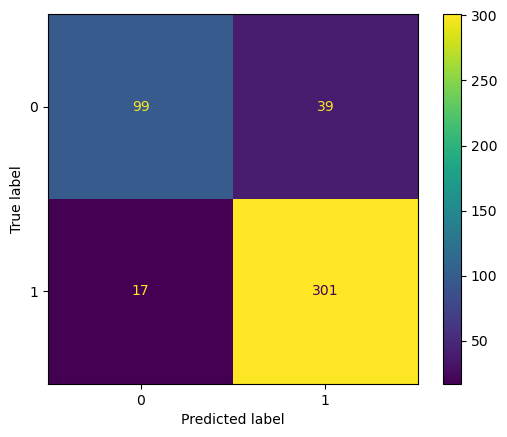

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_predict_rf)

#### Classification Report

In [93]:
print(classification_report(y_train,y_train_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       322
           1       0.86      0.93      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [94]:
print(classification_report(y_test,y_test_predict_rf))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       138
           1       0.89      0.95      0.91       318

    accuracy                           0.88       456
   macro avg       0.87      0.83      0.85       456
weighted avg       0.88      0.88      0.87       456



#### Inferences(Random Forest Model):
##### Random Forest model gives more accurate prediction (88%) and f1-score values are also increased to 74% and 91% compared to above two models.